In [2]:
# Download dataset
from torchvision.datasets import MNIST

In [3]:
np_train_dataset = MNIST('./mnist_train_np/', train=True, download=True)

In [8]:
# Start MLP implementation in numpy

In [9]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder

In [10]:
np.random.seed(3)

In [11]:
def fetch(fp):
    with open(fp, "rb") as f:
        data = f.read()
    return np.frombuffer(data, dtype=np.uint8).copy()

In [12]:
X_train = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/train-images-idx3-ubyte")[0x10:].reshape((-1, 28 * 28))
Y_train = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/train-labels-idx1-ubyte")[8:]
X_test = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/t10k-images-idx3-ubyte")[0x10:].reshape((-1, 28 * 28))
Y_test = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/t10k-labels-idx1-ubyte")[8:]

In [13]:
def normalize_data_and_convert_to_one_hot(X_train, Y_train, X_test, Y_test):
    
    # Encode output label as a one hot vector
    oneHotEncoder = OneHotEncoder(sparse=False, categories='auto')
    Y_train = oneHotEncoder.fit_transform(Y_train.reshape(len(Y_train), -1))
    Y_test = oneHotEncoder.transform(Y_test.reshape(len(Y_test), -1))
    
    # Normalize data by diving by 255. All values are in range 0-255
    X_train = X_train / 255.
    X_test = X_test / 255.

    return X_train, Y_train, X_test, Y_test

In [14]:
X_train, Y_train, X_test, Y_test = normalize_data_and_convert_to_one_hot(X_train, Y_train, X_test, Y_test)

In [15]:
# initialize params
n = 60000
batch_size=128

In [16]:
# initialize weights
def initialize_weights():
    W1 = np.random.uniform(low=-1, high=1, size=(300,784))
    W2 = np.random.uniform(low=-1, high=1, size=(10,300))
    return W1, W2

In [17]:
costs = []
accuracies = []

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [19]:
def softmax(x):
    power = np.exp(x - np.max(x))
    return power / power.sum(axis=0, keepdims=True)

In [20]:
def de_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [21]:
def forward(X, W1, W2):
    Z1 = W1.dot(X.T)
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1)
    A2 = softmax(Z2)
    return A1, W1, Z1, A2, W2, Z2

In [22]:
def backward(X, Y, A1, W1, Z1, A2, W2, Z2):
    dZ2 = A2 - Y.T
    dW2 = dZ2.dot(A1.T) / n
    dZ1 = W2.T.dot(dZ2) * de_sigmoid(Z1)
    dW1 = dZ1.dot(X) / n
    return dW1, dW2

In [23]:
def predict(W1, W2, X, Y):
    A1, W1, Z1, A2, W2, Z2 = forward(X, W1, W2)
    y_hat = np.argmax(A2, axis=0)
    Y = np.argmax(Y, axis = 1)
    accuracy = (y_hat == Y).mean()
    return accuracy * 100

In [24]:
def train_model(X, Y, alpha=0.7, n_iterations=200000):
    W1, W2 = initialize_weights()
    for iteration in range(n_iterations):
        batch = np.random.choice(n, batch_size, replace=False)
        x = X[batch]
        y = Y[batch]
        A1, W1, Z1, A2, W2, Z2 = forward(x, W1, W2)
        cost = -np.mean(y*np.log(A2.T))
        dW1, dW2 = backward(x, y, A1, W1, Z1, A2, W2, Z2)
        W1 = W1 - alpha * dW1
        W2 = W2 - alpha * dW2
        acc = predict(W1, W2, x, y)
        if iteration % 100 == 0:
            print("Cost: ", cost, "Train Accuracy:", acc)
        if iteration % 10 == 0:
            costs.append(cost)
            accuracies.append(acc)
    return W1, W2

In [26]:
W1, W2 = train_model(X_train, Y_train)
print("W1: ", W1)
print("W2: ", W2)

Cost:  0.874547019664076 Train Accuracy: 14.84375
Cost:  0.7248269523012633 Train Accuracy: 17.1875
Cost:  0.6284094789770981 Train Accuracy: 17.96875
Cost:  0.5728659254969496 Train Accuracy: 21.09375
Cost:  0.548305768635139 Train Accuracy: 17.96875
Cost:  0.49221703707322123 Train Accuracy: 24.21875
Cost:  0.4575246958638136 Train Accuracy: 17.96875
Cost:  0.36291714604788944 Train Accuracy: 25.0
Cost:  0.35184685847143493 Train Accuracy: 30.46875
Cost:  0.41019843749690227 Train Accuracy: 29.6875
Cost:  0.38768879710004417 Train Accuracy: 25.78125
Cost:  0.3817420323728511 Train Accuracy: 25.78125
Cost:  0.3127591079827698 Train Accuracy: 32.8125
Cost:  0.3265978905989383 Train Accuracy: 36.71875
Cost:  0.341391315508038 Train Accuracy: 35.9375
Cost:  0.3457426220561123 Train Accuracy: 26.5625
Cost:  0.305499034520685 Train Accuracy: 28.90625
Cost:  0.3045354390368956 Train Accuracy: 31.25
Cost:  0.3107295685731587 Train Accuracy: 28.125
Cost:  0.29724522370104556 Train Accuracy: 3

Cost:  0.09786778709458835 Train Accuracy: 74.21875
Cost:  0.09195780698488645 Train Accuracy: 78.90625
Cost:  0.081900117566692 Train Accuracy: 82.03125
Cost:  0.08380077085028473 Train Accuracy: 80.46875
Cost:  0.09249572036779083 Train Accuracy: 71.875
Cost:  0.08688837328662236 Train Accuracy: 78.125
Cost:  0.09297111618924558 Train Accuracy: 77.34375
Cost:  0.08011954571367624 Train Accuracy: 77.34375
Cost:  0.0762683088519429 Train Accuracy: 75.78125
Cost:  0.08458199818397048 Train Accuracy: 75.78125
Cost:  0.07340554376089885 Train Accuracy: 78.125
Cost:  0.0732857706042934 Train Accuracy: 77.34375
Cost:  0.05694745674764603 Train Accuracy: 81.25
Cost:  0.0822677082755025 Train Accuracy: 82.8125
Cost:  0.05212428712823487 Train Accuracy: 79.6875
Cost:  0.11392571394245414 Train Accuracy: 71.09375
Cost:  0.07170018028302096 Train Accuracy: 78.90625
Cost:  0.056021518427668573 Train Accuracy: 82.8125
Cost:  0.08275508101700539 Train Accuracy: 78.125
Cost:  0.06874095828722807 Tra

Cost:  0.05847775506197332 Train Accuracy: 85.9375
Cost:  0.05732381736229368 Train Accuracy: 82.03125
Cost:  0.06390776030035679 Train Accuracy: 81.25
Cost:  0.04293589308619096 Train Accuracy: 89.84375
Cost:  0.04402526267135913 Train Accuracy: 85.15625
Cost:  0.044693516102022456 Train Accuracy: 84.375
Cost:  0.045365703989893535 Train Accuracy: 83.59375
Cost:  0.05897842442740973 Train Accuracy: 85.15625
Cost:  0.06205770994178787 Train Accuracy: 85.9375
Cost:  0.052690980279791334 Train Accuracy: 82.8125
Cost:  0.0676234195764828 Train Accuracy: 84.375
Cost:  0.051669980467513456 Train Accuracy: 83.59375
Cost:  0.05331305090843834 Train Accuracy: 84.375
Cost:  0.04961901116463686 Train Accuracy: 82.03125
Cost:  0.0538271122786537 Train Accuracy: 87.5
Cost:  0.041338759982952146 Train Accuracy: 88.28125
Cost:  0.07290236134460064 Train Accuracy: 82.8125
Cost:  0.05001614138921395 Train Accuracy: 82.03125
Cost:  0.048639189445327066 Train Accuracy: 83.59375
Cost:  0.0430263833801534

Cost:  0.05410356645539072 Train Accuracy: 83.59375
Cost:  0.05003457796231765 Train Accuracy: 86.71875
Cost:  0.061582756895070825 Train Accuracy: 82.8125
Cost:  0.04161258455195366 Train Accuracy: 90.625
Cost:  0.0692442837902231 Train Accuracy: 81.25
Cost:  0.05507329456506497 Train Accuracy: 79.6875
Cost:  0.06234693571320715 Train Accuracy: 83.59375
Cost:  0.032175013191850725 Train Accuracy: 89.0625
Cost:  0.05320298168495095 Train Accuracy: 85.9375
Cost:  0.056005973083271224 Train Accuracy: 85.9375
Cost:  0.05263864916799692 Train Accuracy: 87.5
Cost:  0.044100855497065106 Train Accuracy: 87.5
Cost:  0.06732733041489646 Train Accuracy: 83.59375
Cost:  0.044209103415487595 Train Accuracy: 88.28125
Cost:  0.06142358906638179 Train Accuracy: 85.15625
Cost:  0.04700348371983828 Train Accuracy: 84.375
Cost:  0.059540415895645384 Train Accuracy: 85.9375
Cost:  0.05341040741768387 Train Accuracy: 85.15625
Cost:  0.057807967529165574 Train Accuracy: 85.15625
Cost:  0.06083207253265286 

Cost:  0.034889542137211474 Train Accuracy: 87.5
Cost:  0.05123431433851892 Train Accuracy: 89.84375
Cost:  0.043906816167874375 Train Accuracy: 84.375
Cost:  0.049465838657559456 Train Accuracy: 85.9375
Cost:  0.06449298368884242 Train Accuracy: 86.71875
Cost:  0.03991886660567321 Train Accuracy: 85.9375
Cost:  0.052572575872911385 Train Accuracy: 85.9375
Cost:  0.04660139352556831 Train Accuracy: 85.15625
Cost:  0.03191453253016544 Train Accuracy: 86.71875
Cost:  0.05027386529310368 Train Accuracy: 90.625
Cost:  0.049429746250052496 Train Accuracy: 85.15625
Cost:  0.04079230195691424 Train Accuracy: 86.71875
Cost:  0.024518854029590694 Train Accuracy: 92.1875
Cost:  0.035565384933334415 Train Accuracy: 89.84375
Cost:  0.0392185395712173 Train Accuracy: 86.71875
Cost:  0.04055105617979209 Train Accuracy: 91.40625
Cost:  0.055872489788060864 Train Accuracy: 85.15625
Cost:  0.03458778672658971 Train Accuracy: 89.84375
Cost:  0.06594094665147499 Train Accuracy: 81.25
Cost:  0.03656457370

Cost:  0.02821199434224953 Train Accuracy: 90.625
Cost:  0.018509059901393884 Train Accuracy: 93.75
Cost:  0.022790107684758996 Train Accuracy: 92.1875
Cost:  0.04055661835436038 Train Accuracy: 85.9375
Cost:  0.056293877605820886 Train Accuracy: 82.8125
Cost:  0.03988065470186429 Train Accuracy: 86.71875
Cost:  0.06702673662076583 Train Accuracy: 83.59375
Cost:  0.036464100383617484 Train Accuracy: 89.84375
Cost:  0.032389818591475036 Train Accuracy: 89.84375
Cost:  0.05066010337967093 Train Accuracy: 83.59375
Cost:  0.04961125705861326 Train Accuracy: 85.9375
Cost:  0.04750102210828064 Train Accuracy: 85.9375
Cost:  0.0620116443885549 Train Accuracy: 82.8125
Cost:  0.03507896138696368 Train Accuracy: 89.84375
Cost:  0.038290616002478496 Train Accuracy: 89.0625
Cost:  0.029267021232444547 Train Accuracy: 91.40625
Cost:  0.0344033105506434 Train Accuracy: 88.28125
Cost:  0.031204850945397766 Train Accuracy: 90.625
Cost:  0.047845223998316234 Train Accuracy: 88.28125
Cost:  0.0282318181

Cost:  0.04905894794010634 Train Accuracy: 88.28125
Cost:  0.03148839940592306 Train Accuracy: 92.96875
Cost:  0.05375420706346205 Train Accuracy: 87.5
Cost:  0.025430254476545584 Train Accuracy: 91.40625
Cost:  0.030425168630646197 Train Accuracy: 92.1875
Cost:  0.032125937420427866 Train Accuracy: 89.84375
Cost:  0.04643911796472048 Train Accuracy: 86.71875
Cost:  0.04109589350561888 Train Accuracy: 87.5
Cost:  0.02399657851119967 Train Accuracy: 92.1875
Cost:  0.033359412033117854 Train Accuracy: 94.53125
Cost:  0.04249195065336377 Train Accuracy: 85.15625
Cost:  0.06134173017546892 Train Accuracy: 83.59375
Cost:  0.04121196189512277 Train Accuracy: 89.84375
Cost:  0.024958196988885413 Train Accuracy: 91.40625
Cost:  0.027936003575681278 Train Accuracy: 90.625
Cost:  0.03340976009460234 Train Accuracy: 90.625
Cost:  0.03238897912115294 Train Accuracy: 89.84375
Cost:  0.04656513428774115 Train Accuracy: 88.28125
Cost:  0.023852665113981864 Train Accuracy: 95.3125
Cost:  0.03739698056

Cost:  0.03598478202823872 Train Accuracy: 88.28125
Cost:  0.01738598525762331 Train Accuracy: 94.53125
Cost:  0.03179745937878085 Train Accuracy: 89.0625
Cost:  0.0315376342419854 Train Accuracy: 89.84375
Cost:  0.02248310720124519 Train Accuracy: 92.96875
Cost:  0.02529002203653416 Train Accuracy: 94.53125
Cost:  0.03887459598149112 Train Accuracy: 87.5
Cost:  0.052872204583432184 Train Accuracy: 85.9375
Cost:  0.03714727913792626 Train Accuracy: 89.84375
Cost:  0.03536295610256826 Train Accuracy: 88.28125
Cost:  0.021737603954759276 Train Accuracy: 89.84375
Cost:  0.02850862792051968 Train Accuracy: 92.1875
Cost:  0.024988987610742208 Train Accuracy: 92.96875
Cost:  0.042738005074534985 Train Accuracy: 86.71875
Cost:  0.03796825141066899 Train Accuracy: 89.0625
Cost:  0.022134932885558206 Train Accuracy: 93.75
Cost:  0.034191170052155814 Train Accuracy: 89.0625
Cost:  0.031419837964701824 Train Accuracy: 89.0625
Cost:  0.030600280863000456 Train Accuracy: 92.96875
Cost:  0.033069442

Cost:  0.011322241866584393 Train Accuracy: 96.09375
Cost:  0.026534367700875215 Train Accuracy: 89.84375
Cost:  0.050813864907083804 Train Accuracy: 88.28125
Cost:  0.03200528960890649 Train Accuracy: 92.1875
Cost:  0.033150729172430296 Train Accuracy: 91.40625
Cost:  0.026370518677629084 Train Accuracy: 93.75
Cost:  0.03248118030653424 Train Accuracy: 90.625
Cost:  0.04274512551375566 Train Accuracy: 90.625
Cost:  0.03102102739114946 Train Accuracy: 89.84375
Cost:  0.0489488856565677 Train Accuracy: 89.84375
Cost:  0.03194012236642937 Train Accuracy: 89.0625
Cost:  0.036418529000333016 Train Accuracy: 89.84375
Cost:  0.026619325243757385 Train Accuracy: 92.96875
Cost:  0.01955442675655254 Train Accuracy: 91.40625
Cost:  0.017920838637178783 Train Accuracy: 93.75
Cost:  0.037554427535882555 Train Accuracy: 89.0625
Cost:  0.03804977078922069 Train Accuracy: 87.5
Cost:  0.03300977535330648 Train Accuracy: 89.0625
Cost:  0.019853533441826575 Train Accuracy: 92.96875
Cost:  0.033785669415

Cost:  0.027160719790535536 Train Accuracy: 92.96875
Cost:  0.017023482660786182 Train Accuracy: 95.3125
Cost:  0.026914271354181396 Train Accuracy: 92.1875
Cost:  0.032412147493012 Train Accuracy: 86.71875
Cost:  0.02154123949269272 Train Accuracy: 94.53125
Cost:  0.04600178168664572 Train Accuracy: 86.71875
Cost:  0.019440207918430274 Train Accuracy: 95.3125
Cost:  0.02451020876439153 Train Accuracy: 94.53125
Cost:  0.021352072344188445 Train Accuracy: 93.75
Cost:  0.026763631392087685 Train Accuracy: 92.1875
Cost:  0.03462025894876379 Train Accuracy: 89.0625
Cost:  0.04996965112733066 Train Accuracy: 85.9375
Cost:  0.029083901250599436 Train Accuracy: 92.1875
Cost:  0.03852160476701085 Train Accuracy: 89.0625
Cost:  0.024650547112633446 Train Accuracy: 91.40625
Cost:  0.0410165947177474 Train Accuracy: 85.9375
Cost:  0.02987710066265431 Train Accuracy: 89.0625
Cost:  0.033977200527289156 Train Accuracy: 92.96875
Cost:  0.03524793704464878 Train Accuracy: 89.0625
Cost:  0.01630919863

Cost:  0.0269913926891564 Train Accuracy: 93.75
Cost:  0.01855721532081022 Train Accuracy: 94.53125
Cost:  0.028461544857549547 Train Accuracy: 92.96875
Cost:  0.01836821301294992 Train Accuracy: 92.1875
Cost:  0.04681506711919641 Train Accuracy: 85.15625
Cost:  0.028051388500614883 Train Accuracy: 89.0625
Cost:  0.026739833332720897 Train Accuracy: 90.625
Cost:  0.029927734255740485 Train Accuracy: 89.84375
Cost:  0.02629583086178989 Train Accuracy: 91.40625
Cost:  0.04680285688125861 Train Accuracy: 86.71875
Cost:  0.03253806935056726 Train Accuracy: 92.96875
Cost:  0.028637694037049445 Train Accuracy: 90.625
Cost:  0.014750235761829577 Train Accuracy: 93.75
Cost:  0.03667806484352283 Train Accuracy: 89.84375
Cost:  0.04423576881216544 Train Accuracy: 90.625
Cost:  0.02190158140787667 Train Accuracy: 95.3125
Cost:  0.018745505745763398 Train Accuracy: 94.53125
Cost:  0.020660912676213734 Train Accuracy: 93.75
Cost:  0.03257456882566282 Train Accuracy: 89.84375
Cost:  0.02190061521467

Cost:  0.018493220905160528 Train Accuracy: 92.96875
Cost:  0.03224144032419464 Train Accuracy: 89.84375
Cost:  0.03301135521926161 Train Accuracy: 89.0625
Cost:  0.009889691244599198 Train Accuracy: 97.65625
Cost:  0.03241272978678715 Train Accuracy: 91.40625
Cost:  0.022191782564960034 Train Accuracy: 92.96875
Cost:  0.02908706094408316 Train Accuracy: 92.96875
Cost:  0.021314951540106108 Train Accuracy: 89.0625
Cost:  0.019086859259790322 Train Accuracy: 95.3125
Cost:  0.026828171675529717 Train Accuracy: 92.1875
Cost:  0.020124794623725583 Train Accuracy: 95.3125
Cost:  0.0321316733000759 Train Accuracy: 92.96875
Cost:  0.021224810601338802 Train Accuracy: 93.75
Cost:  0.025748061454579814 Train Accuracy: 94.53125
Cost:  0.031222982403771665 Train Accuracy: 90.625
Cost:  0.030828832078182867 Train Accuracy: 89.84375
Cost:  0.02288870459212013 Train Accuracy: 89.84375
Cost:  0.05429678599334738 Train Accuracy: 84.375
Cost:  0.03531056596687308 Train Accuracy: 88.28125
Cost:  0.03416

Cost:  0.018744266075555953 Train Accuracy: 94.53125
Cost:  0.03387617020039911 Train Accuracy: 89.84375
Cost:  0.027470267092322947 Train Accuracy: 90.625
Cost:  0.046958422412590906 Train Accuracy: 85.9375
Cost:  0.026046873263934095 Train Accuracy: 88.28125
Cost:  0.035015350099122225 Train Accuracy: 92.1875
Cost:  0.02483573762629292 Train Accuracy: 93.75
Cost:  0.03892959606789368 Train Accuracy: 85.9375
Cost:  0.039488797288630056 Train Accuracy: 88.28125
Cost:  0.02027676842723129 Train Accuracy: 92.96875
Cost:  0.02863331255582958 Train Accuracy: 94.53125
Cost:  0.029087094839418282 Train Accuracy: 89.0625
Cost:  0.014406120223070515 Train Accuracy: 94.53125
Cost:  0.02144034001489133 Train Accuracy: 92.96875
Cost:  0.022416232327193884 Train Accuracy: 93.75
Cost:  0.011894889126248403 Train Accuracy: 96.09375
Cost:  0.019324079200017375 Train Accuracy: 92.96875
Cost:  0.024831540094302284 Train Accuracy: 90.625
Cost:  0.02470858746868739 Train Accuracy: 91.40625
Cost:  0.03594

In [ ]:
# batch_size = 128
# n_iterations = 200000
# learning rate = 0.7

In [27]:
predict(W1, W2, X_train, Y_train)

92.015

In [28]:
predict(W1, W2, X_test, Y_test)

91.61

In [44]:
test_error = 100 - predict(W1, W2, X_test, Y_test)
test_error

8.39

In [29]:
def plot_cost():
    plt.figure()
    plt.plot(np.arange(len(costs)), costs)
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.show()

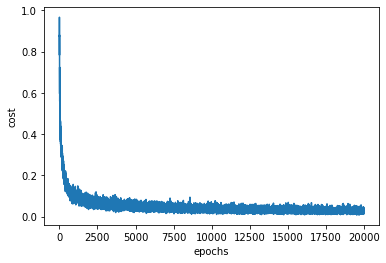

In [30]:
plot_cost()

In [31]:
def plot_accuracy():
    plt.figure()
    plt.plot(np.arange(len(accuracies)), accuracies)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.show()

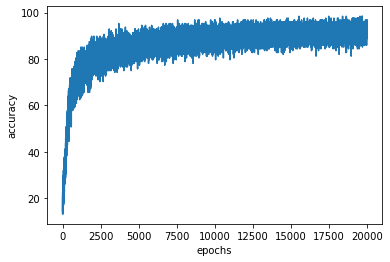

In [32]:
plot_accuracy()

In [34]:
len(costs)

20000

In [35]:
len(accuracies)

20000

In [36]:
n_costs = costs

In [37]:
cost = 0
avg_costs = []
iterations = []
for i in range(len(n_costs)):
    cost+= n_costs[i]
    if (i+1) % 100 == 0:
        cost /= 100
        avg_costs.append(cost)
        iterations.append((i+1)*10)

In [38]:
def plot_avg_cost():
    plt.figure()
    plt.plot(iterations, avg_costs)
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.show()

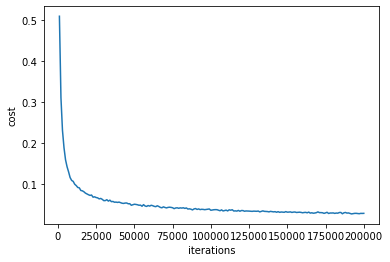

In [39]:
plot_avg_cost()

In [40]:
n_accuracies = accuracies

In [41]:
accuracy = 0
avg_accs = []
iterations = []
for i in range(len(n_accuracies)):
    accuracy+= n_accuracies[i]
    if (i+1) % 100 == 0:
        accuracy /= 100
        avg_accs.append(accuracy)
        iterations.append((i+1)*10)

In [42]:
def plot_avg_accuracy():
    plt.figure()
    plt.plot(iterations, avg_accs)
    plt.xlabel("iterations")
    plt.ylabel("accuracy")
    plt.show()

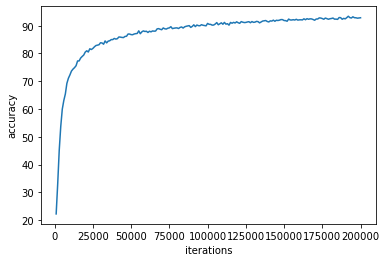

In [43]:
plot_avg_accuracy()